# Group Assignment - SSK5603

Heart Disease Prediction Using Classifier Models

    MOHD FIRDAUS BIN ZAHRIN - GS58180
    ALDOSKI ARI SARBAST SHAMSADEEN
    MEOR MUHAMMAD NAZMI BIN MEOR YUSOFF

In [573]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
plt.style.use('ggplot')
%matplotlib inline

#dfcc = pd.read_csv('E:/UPM/OneDrive - Universiti Putra Malaysia/Sem 1/Machine Learning/Group Project/Dataset/heart.csv')
#dfcc = pd.read_csv('E:/UPM/OneDrive - Universiti Putra Malaysia/Sem 1/Machine Learning/Group Project/Dataset/heart-cleaned.csv')
dfcc = pd.read_csv('E:/UPM/OneDrive - Universiti Putra Malaysia/Sem 1/Machine Learning/Group Project/Dataset/heart-cleaned-clustered.csv')

## A few more things to consider to clean the dataset:

    •    Record rows 93, 159, 164, 165 and 252 have ca = 4, which are incorrect. (5 data)
    •    Record rows 49 and 282 have thal = 0, which are incorrect. (2 data)
 
 The original total rows are 303. After the data cleaning, the dataset remains 296.

In [574]:
dfcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


In [575]:
dfcc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
1,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
2,57,1,0,110,201,0,1,126,1,1.5,1,0,1,0
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2,0
4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,0


In [576]:
data = dfcc.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column

Correlation indicates how the features are related to each other or to the target variable. The correlation may be positive (increase in one value of the feature increases the value of the target variable)

<AxesSubplot:>

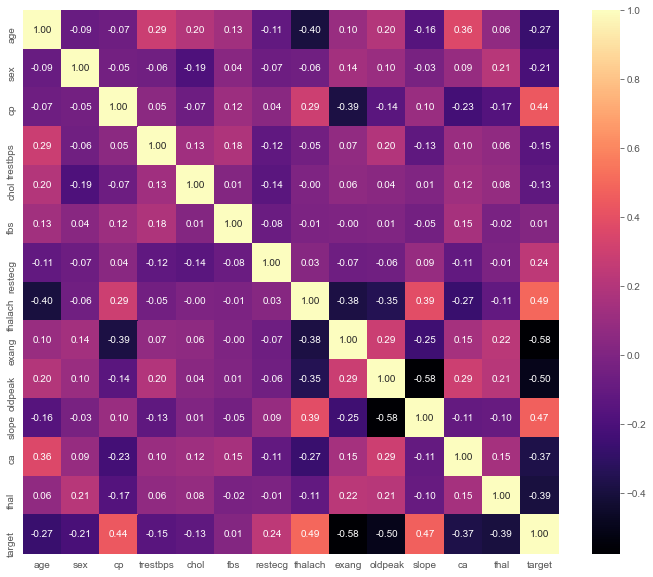

In [577]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcc.corr(),annot=True,cmap="magma",fmt='.2f')

From this heatmap, we can observe that the 'cp' (chest pain), 'thalach' (maximum heart rate achieved) and 'slope' (the slope of the peak exercise Stress Testing segment) are related to the target variable. We can say that these features so called symptoms that contribute the most in predicting a heart disease's presence. A medical emergency is a heart attack. A cardiac usually occurs when a blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies, causing chest pain.

In [578]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [579]:
df2 = dfcc.copy()

In [580]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [581]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

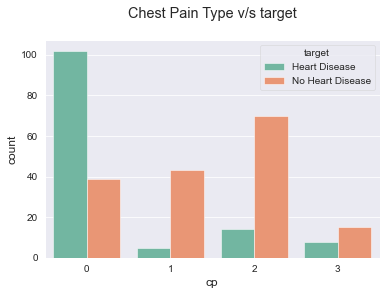

In [582]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

The chest pain type: 

(0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina)

Text(0.5, 1.0, 'Slope v/s Target\n')

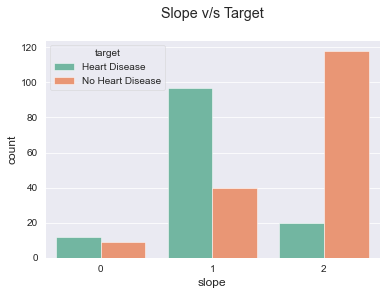

In [583]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

slope: the slope of the peak exercise Stress Testing segment

(0: downsloping; 1: flat; 2: upsloping)

c:\wpy64-3771\python-3.7.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

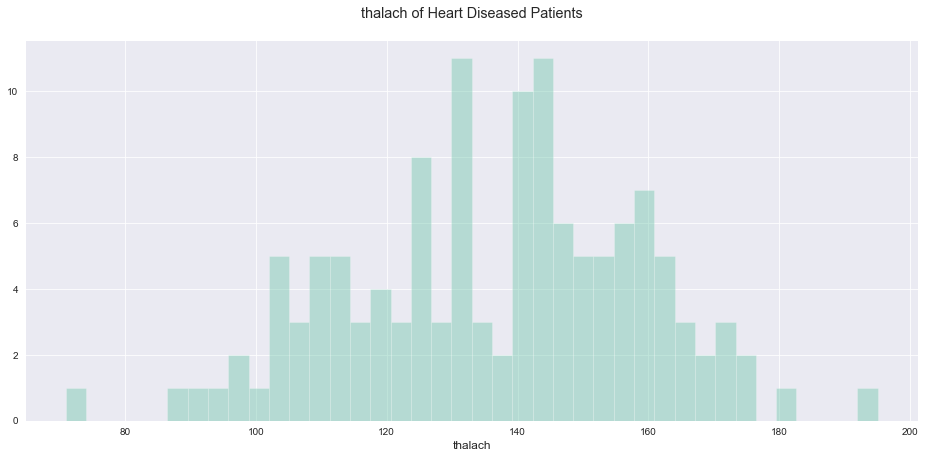

In [584]:
plt.figure(figsize=(16,7))
sns.distplot(dfcc[dfcc['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

# Classification Tree

In [585]:
#Decision Tree Model
X = dfcc.iloc[:,0:13] # Features
y = dfcc.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  #80% training and 20% test

In [586]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(np.nan_to_num(X_test))

# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, y_pred)
tree_score = round(tree_score, 2)
print("Accuracy:",tree_score)

Accuracy: 0.88


In [587]:
#change name of the column

In [588]:
dfcc.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

# Logistic Regression

In [589]:
X = dfcc.drop('target', axis = 1)
y = dfcc['target']

In [590]:
#Splitting Data

In [591]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) #80% training and 20% test

In [592]:
#Normalization

In [593]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values

X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

# Fitting into Model

In [594]:
#Logistic Regression Model
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction

In [595]:
y_pred = logre.predict(np.nan_to_num(X_test))

In [596]:
actual = []
prediction = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  prediction.append(j) 

dic = {'Validation':actual,
       'Prediction':prediction
       }

In [597]:
result  = pd.DataFrame(dic)

In [598]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Validation'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

# Model Evaluation

In [599]:
from sklearn.metrics import accuracy_score
logistic_score = accuracy_score(y_test,y_pred)
logistic_score = round(logistic_score, 2)
print(logistic_score)

0.9


In [600]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        33

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



[[23  4]
 [ 2 31]]


<AxesSubplot:>

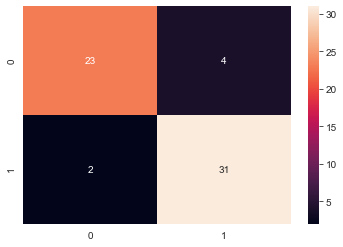

In [601]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

#Heart disease (0 = disease, 1 = no disease)

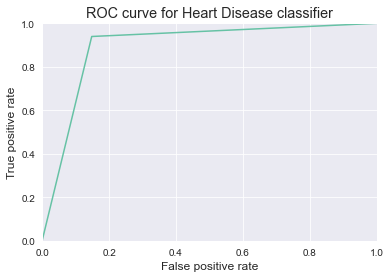

In [602]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

In [603]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8956228956228957

# Hybrid Model

Stacking the classifier models (Logistic Regression and Decision Tree)

In [604]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard') #stacking the models
model.fit(X_train,y_train) #fitting into the hybrid model (training the data set)
hybrid_score = model.score(X_test,y_test) #accuracy on the given test data and labels
hybrid_score = round(hybrid_score, 2)
print(hybrid_score)

0.93


# Hybrid Model Prediction

In [605]:
y_pred = model.predict(X_test)

In [606]:
actual = []
prediction = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  prediction.append(j) 

dic = {'Validation':actual,
       'Prediction':prediction
       }

In [607]:
result = pd.DataFrame(dic)

In [608]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Validation'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Prediction'))

# Hybrid Model Evaluation

In [609]:
hybridmodel_score = accuracy_score(y_test,y_pred)
print(hybridmodel_score)

0.9333333333333333


In [610]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       1.00      0.88      0.94        33

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



[[27  0]
 [ 4 29]]


<AxesSubplot:>

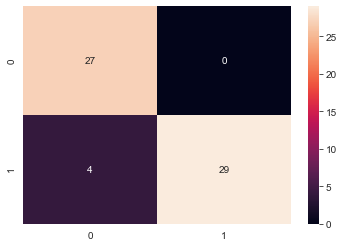

In [611]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

#Heart disease (0 = disease, 1 = no disease)

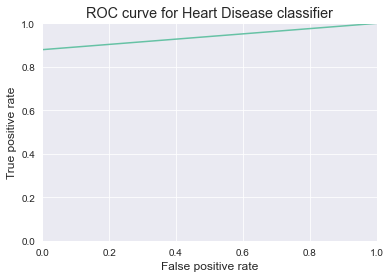

In [612]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

In [613]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.9393939393939394

In [614]:
score = {'model': ['Decision Tree', 'Logistic Regression', 'Hybrid (Tree + Logistic)'],
	     'accuracy': [tree_score, logistic_score, hybrid_score]}

df_score= pd.DataFrame(score)
df_score.head()

,model,accuracy
0,Decision Tree,0.88
1,Logistic Regression,0.90
2,Hybrid (Tree + Logistic),0.93


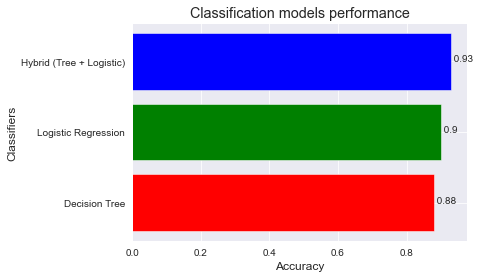

In [615]:
x = df_score['model']
y = df_score['accuracy']
plt.barh(x, y, color=['red', 'green', 'blue'])

# Add title and axis names
plt.title('Classification models performance')
plt.ylabel('Classifiers')
plt.xlabel('Accuracy')


for index, value in enumerate(y):
    plt.text(value, index, ' ' + str(value))

# Hybrid Model Testing

In [616]:
#testing data (external data set)
dfv = pd.read_csv('E:/UPM/OneDrive - Universiti Putra Malaysia/Sem 1/Machine Learning/Group Project/Dataset/test_set.csv')

In [617]:
datav = dfv.copy()
X_val = datav.iloc[:,0:13]  #attributes columns
#y_val = datav.iloc[:,-1]  
datav = X_val

In [618]:
datav.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2
1,62,1,2,130,231,0,1,146,0,1.8,1,3,3
2,76,0,2,140,197,0,2,116,0,1.1,1,0,2
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2
4,64,0,2,140,313,0,1,133,0,0.2,2,0,3
5,54,0,1,132,288,1,0,159,1,0.0,2,1,2
6,57,1,0,110,201,0,1,126,1,1.5,1,0,1
7,51,0,2,140,308,0,0,142,0,1.5,2,1,2
8,45,0,1,130,234,0,0,175,0,0.6,1,0,2
9,54,1,2,125,273,0,0,152,0,0.5,0,1,2


In [619]:
y_pred = model.predict(X_val)

In [620]:
actual = []
prediction = []

for j in y_pred:
  prediction.append(j)

dic = {'Prediction':prediction}

In [621]:
pred = pd.DataFrame(data=prediction, index=None, columns=['PREDICTION'])
datav = datav.append(pred)

new_df = pd.DataFrame({'PREDICTION': prediction})
datav.update(new_df)

In [622]:
#Heart disease (0 = disease, 1 = no disease)
datav.loc[datav['PREDICTION'] == 0, 'PREDICTION'] = 'heart disease'
datav.loc[datav['PREDICTION'] == 1, 'PREDICTION'] = 'no heart disease'

In [623]:
datav.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,PREDICTION
0,68.0,0.0,2.0,120.0,211.0,0.0,0.0,115.0,0.0,1.5,1.0,0.0,2.0,heart disease
1,62.0,1.0,2.0,130.0,231.0,0.0,1.0,146.0,0.0,1.8,1.0,3.0,3.0,no heart disease
2,76.0,0.0,2.0,140.0,197.0,0.0,2.0,116.0,0.0,1.1,1.0,0.0,2.0,heart disease
3,45.0,1.0,0.0,104.0,208.0,0.0,0.0,148.0,1.0,3.0,1.0,0.0,2.0,no heart disease
4,64.0,0.0,2.0,140.0,313.0,0.0,1.0,133.0,0.0,0.2,2.0,0.0,3.0,heart disease
5,54.0,0.0,1.0,132.0,288.0,1.0,0.0,159.0,1.0,0.0,2.0,1.0,2.0,heart disease
6,57.0,1.0,0.0,110.0,201.0,0.0,1.0,126.0,1.0,1.5,1.0,0.0,1.0,no heart disease
7,51.0,0.0,2.0,140.0,308.0,0.0,0.0,142.0,0.0,1.5,2.0,1.0,2.0,heart disease
8,45.0,0.0,1.0,130.0,234.0,0.0,0.0,175.0,0.0,0.6,1.0,0.0,2.0,heart disease
9,54.0,1.0,2.0,125.0,273.0,0.0,0.0,152.0,0.0,0.5,0.0,1.0,2.0,heart disease


In [624]:
import plotly.graph_objects as go
 
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers+lines',
                    name='Prediction'))

#Heart disease (0 = disease, 1 = no disease)